# 重み係数

In [18]:
import sympy
import numpy as np
import scipy.fftpack
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

plt.rcParams["font.family"] = "Source Han Sans JP"  # 使用するフォント
plt.rcParams["xtick.direction"] = "in"  # x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"  # y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.width"] = 1.0  # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.0  # y軸主目盛り線の線幅
plt.rcParams["font.size"] = 12  # フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.0  # 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()


$$L_j(x) = \int \prod_{\begin{array}{c} \ell = 0\\ \ell \neq qj \end{array}}^{n-1} \frac{(x-s_\ell)}{(s_j - s_\ell)}dx$$

In [2]:
n_bar = 4 # 拘束点数, 次数の上限値
N = 8 # ブロックサイズ

In [3]:
s = np.arange(4)/(n_bar -1)
s

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [4]:
x = sympy.Symbol("x")
for j in range(n_bar):
    L_x = 1.0
    for l in range(n_bar):
        if l != j:
            L_x *= (x - s[l])/(s[j] - s[l])
    print("L_" + str(j) + "(x) = " + str(L_x) + "\n") 
    print("\int L_" + str(j) + "(x) = " + str(sympy.integrate(L_x)) + "\n")

L_0(x) = (1.0 - 3.0*x)*(1.0 - 1.5*x)*(1.0 - 1.0*x)

\int L_0(x) = -1.125*x**4 + 3.0*x**3 - 2.75*x**2 + 1.0*x

L_1(x) = 3.0*x*(1.5 - 1.5*x)*(2.0 - 3.0*x)

\int L_1(x) = 3.375*x**4 - 7.5*x**3 + 4.5*x**2

L_2(x) = 1.5*x*(3.0 - 3.0*x)*(3.0*x - 1.0)

\int L_2(x) = -3.375*x**4 + 6.0*x**3 - 2.25*x**2

L_3(x) = 1.0*x*(1.5*x - 0.5)*(3.0*x - 2.0)

\int L_3(x) = 1.125*x**4 - 1.5*x**3 + 0.5*x**2



In [9]:
def L_j(j,s,n_bar):
    x = sympy.Symbol("x")
    L_x = 1.0
    for l in range(n_bar):
        if l != j:
            L_x *= (x - s[l])/(s[j] - s[l])
    return sympy.integrate(L_x)

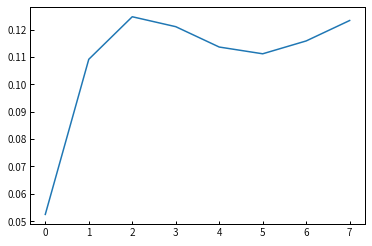

In [10]:
j = 0
tmp = []
x_l = (0.5 + np.arange(N)) / N
L_0 = L_j(0,s,n_bar)
for xl in x_l:
    tmp.append(L_0.subs(x,xl))
L_0_array = np.array(tmp)
L_0_array = L_0_array.astype("f8")
plt.plot(L_0_array)
# plt.plot((1-3*x_l)*(1-1.5*x_l)*(1-1*x_l))
# plt.plot(x_l,-1.125*x_l**4 + 3*x_l**3 - 2.75*x_l**2 + x_l)

In [8]:
scipy.fftpack.dct(L_0_array, norm="ortho")

array([ 0.3082317 , -0.03308095, -0.02931474, -0.03754339, -0.01782441,
       -0.01199148, -0.00626287, -0.00307165])

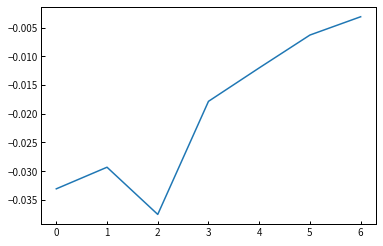

In [9]:
plt.plot(scipy.fftpack.dct(-1.125*x_l**4 + 3*x_l**3 - 2.75*x_l**2 + x_l, norm="ortho")[1:])

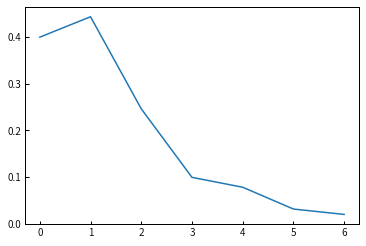

In [10]:
plt.plot(scipy.fftpack.dct((1-3*x_l)*(1-3*x_l/2)*(1-x_l), norm="ortho")[1:])

In [11]:
w_k_0 = []
for k in range(8):
    lambda_k = 1
    if k == 0:
        lambda_k = 1/np.sqrt(2)
        
    tmp = np.sum(L_0_array * np.cos(np.pi * k * x_l))
    w_k_0.append(np.sqrt(2/N) * lambda_k * tmp)
w_k_0

[0.3082317042777511,
 -0.033080949162765924,
 -0.029314736308804004,
 -0.037543385459951506,
 -0.01782440799743921,
 -0.011991482108640393,
 -0.006262867397389821,
 -0.0030716485238224817]

In [12]:
xi = (np.arange(n_bar+1)-0.5)/(n_bar-1)
xi

array([-0.16666667,  0.16666667,  0.5       ,  0.83333333,  1.16666667])

In [13]:
k_hat = 0
for k in range(8):
    lambda_k = 1
    if k_hat == 0:
        lambda_k = 1/np.sqrt(2)
    print(
        (1-n_bar) * np.sqrt(2/N) * lambda_k * np.cos(np.pi * k_hat * (xi[0] + 1)) * w_k_0[k] 
    )

-0.3269290924072265
0.035087645221618835
0.031092973248976218
0.0398207736711482
0.018905639648437493
0.012718887473245172
0.006642774009549729
0.0032579752509247877


In [21]:
k_hat = 1
for k in range(8):
    lambda_k = 1
    if k_hat == 0:
        lambda_k = 1/np.sqrt(2)
    print(
        (1-n_bar) * np.sqrt(2/N) * lambda_k * np.cos(np.pi * k_hat * (xi[0] + 1)) * w_k_0[k] 
    )

0.40040472923445763
-0.042973413534385274
-0.0380809595229995
-0.04877028832858399
-0.023154585199801306
-0.015577392202663753
-0.008135703400009374
-0.0039901884796908595


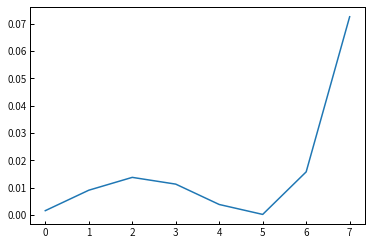

In [15]:
j = 3
tmp = []
x_l = (0.5 + np.arange(N)) / N
L_3 = L_j(3,s,n_bar)
for xl in x_l:
    tmp.append(L_3.subs(x,xl))
L_3_array = np.array(tmp)
L_3_array = L_3_array.astype("f8")
plt.plot(L_3_array)

In [18]:
w_k_3 = []
for k in range(8):
    lambda_k = 1
    if k == 0:
        lambda_k = 1/np.sqrt(2)
        
    tmp = np.sum(L_3_array * np.cos(np.pi * k * x_l))
    w_k_3.append(np.sqrt(2/N) * lambda_k * tmp)
w_k_3

[0.04532168631552271,
 -0.033080949162765994,
 0.02931473630880399,
 -0.03754338545995149,
 0.017824407997439128,
 -0.011991482108640403,
 0.006262867397389727,
 -0.003071648523822453]

In [19]:
k_hat = 0
for k in range(8):
    lambda_k = 1
    if k_hat == 0:
        lambda_k = 1/np.sqrt(2)
    print(
        (n_bar-1) * np.sqrt(2/N) * lambda_k * np.cos(np.pi * k_hat * (xi[4] - 1)) * w_k_3[k] 
    )

0.04807090759277349
-0.03508764522161891
0.0310929732489762
-0.03982077367114819
0.018905639648437403
-0.012718887473245183
0.00664277400954963
-0.0032579752509247573


In [20]:
k_hat = 1
for k in range(8):
    lambda_k = 1
    if k_hat == 0:
        lambda_k = 1/np.sqrt(2)
    print(
        (n_bar-1) * np.sqrt(2/N) * lambda_k * np.cos(np.pi * k_hat * (xi[4] - 1)) * w_k_3[k] 
    )

0.058874597537388336
-0.042973413534385364
0.03808095952299948
-0.048770288328583974
0.023154585199801198
-0.015577392202663767
0.008135703400009252
-0.003990188479690822


[-0.         -0.13396226 -0.06528302 -0.03754717 -0.01783019 -0.01198113
 -0.00626415 -0.00307547]


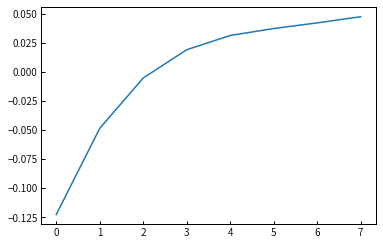

In [19]:
a = np.array([0,0.142, 0.0692, 0.0398, 0.0189, 0.0127, 0.00664, 0.00326]) / (-1.06)
print(a)
b = scipy.fftpack.idct(a,norm="ortho")
plt.plot(b)

In [12]:
def L_j(j,s,n_bar):
    x = sympy.Symbol("x")
    L_x = 1.0
    for l in range(n_bar):
        if l != j:
            L_x *= (x - s[l])/(s[j] - s[l])
    
    return L_x

f(x) = 3xをラグランジュで補間する

3.0*x*(1.5 - 1.5*x)*(2.0 - 3.0*x) + 3.0*x*(3.0 - 3.0*x)*(3.0*x - 1.0) + 3.0*x*(1.5*x - 0.5)*(3.0*x - 2.0)


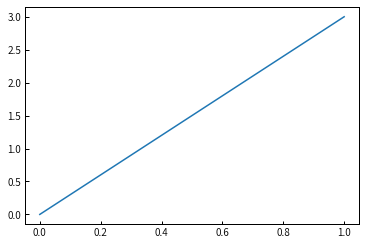

In [13]:
ly = 0
yj = [0,1,2,3]
for j in range(4):
    ly += yj[j] * L_j(j,s,n_bar)
print(ly) 

y = []
for ss in s:
    y.append(ly.subs(x,ss))
    
plt.plot(s,y)

x = 0, 0.3, 0.6, 1の4点で df(x)/dx = 3 を持つ関数f(x)をラグランジュ補間で求める  
df(x)/dx = 3  
f(x) = 3x

-8.88178419700125e-16*x**4 + 5.32907051820075e-15*x**3 - 2.44249065417534e-15*x**2 + 3.0*x


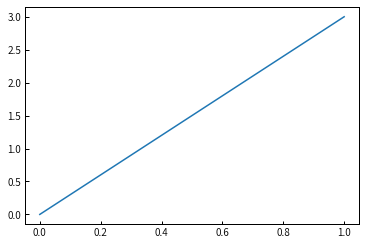

In [17]:
ly = 0
yj = [3,3,3,3]
for j in range(4):
    ly += yj[j] * sympy.integrate(L_j(j,s,n_bar)) 
print(ly) 

y = []
for ss in s:
    y.append(ly.subs(x,ss))
    
plt.plot(s,y)

$\bar{n}=4, N=8$

$$w_{k,j}=\sqrt{\frac{2}{N}}\lambda_k \sum_{\ell = 0}^{N-1}L_j(x_\ell)\cos(\pi k x_\ell)$$

$$W_{k,\hat{k}}^{L} = (1-n)\sqrt{\frac{2}{N}} \lambda_k \cos(\pi \hat{k}(\xi_0 + 1))w_{k,0} $$

In [7]:
co = np.zeros((N,N))

In [11]:
for i in range(1,N):
    for ik in range(0,N-1):
        co[ik+1,i] = np.cos(np.pi * ik * x_l[i])

In [19]:
pd.DataFrame(co)

,0,1,2,3,4,5,6,7
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.0,0.831470,0.555570,0.195090,-0.195090,-0.555570,-0.831470,-0.980785
3,0.0,0.382683,-0.382683,-0.923880,-0.923880,-0.382683,0.382683,0.923880
4,0.0,-0.195090,-0.980785,-0.555570,0.555570,0.980785,0.195090,-0.831470
5,0.0,-0.707107,-0.707107,0.707107,0.707107,-0.707107,-0.707107,0.707107
6,0.0,-0.980785,0.195090,0.831470,-0.831470,-0.195090,0.980785,-0.555570
7,0.0,-0.923880,0.923880,-0.382683,-0.382683,0.923880,-0.923880,0.382683


In [26]:
P0 = np.zeros(N)
P0 = (-9/8) * x_l**4 + 3 * x_l ** 3 + (-11/4) * x_l **2 + x_l
P0

In [30]:
P0mat = P0.reshape((N,1))
P0mat

In [32]:
p0temp = co * P0mat
p0temp

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.10920525,  0.10920525,  0.10920525,  0.10920525,
         0.10920525,  0.10920525,  0.10920525],
       [ 0.        ,  0.10374181,  0.06931806,  0.02434127, -0.02434127,
        -0.06931806, -0.10374181, -0.12237181],
       [ 0.        ,  0.04635736, -0.04635736, -0.11191657, -0.11191657,
        -0.04635736,  0.04635736,  0.11191657],
       [ 0.        , -0.02218008, -0.11150678, -0.06316352,  0.06316352,
         0.11150678,  0.02218008, -0.09453089],
       [ 0.        , -0.078644  , -0.078644  ,  0.078644  ,  0.078644  ,
        -0.078644  , -0.078644  ,  0.078644  ],
       [ 0.        , -0.11369176,  0.0226147 ,  0.09638322, -0.09638322,
        -0.0226147 ,  0.11369176, -0.06440121],
       [ 0.        , -0.11400296,  0.11400296, -0.04722157, -0.04722157,
         0.11400296, -0.11400296,  0.04722157]])

In [37]:
np.sum(p0temp, axis = 0) * np.sqrt(1/N)

array([ 0.        , -0.02447098,  0.0278009 ,  0.03050178, -0.01019997,
        0.04164183, -0.00175162,  0.02322262])